In [10]:
import numpy as np             
import sounddevice as sd        #importamos sounddevice paquete para la reproduccion y grabacion de audio 
from scipy.io import wavfile    #modulo para lecto-escritura de archivos .wav
import matplotlib.pyplot as plt
import IPython

In [3]:
from acousticfield.generate import sweep, puretone, whitenoise, pinknoise
from acousticfield.io import play_rec
from acousticfield.process import ir_extract

In [4]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (Realtek(R) Audio), MME (2 in, 0 out)
   2 Microphone (Logitech BRIO), MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Speakers (Realtek(R) Audio), MME (0 in, 8 out)
   5 S23C350 (NVIDIA High Definition, MME (0 in, 2 out)
   6 Nx Headphones (Waves Virtual Au, MME (0 in, 8 out)
   7 Realtek Digital Output (Realtek, MME (0 in, 2 out)
   8 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   9 Microphone (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  10 Microphone (Logitech BRIO), Windows DirectSound (2 in, 0 out)
  11 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  12 Speakers (Realtek(R) Audio), Windows DirectSound (0 in, 8 out)
  13 S23C350 (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  14 Nx Headphones (Waves Virtual Audio Device), Windows DirectSound (0 in, 8 out)
  15 Realtek Digital Output (Realtek(R) Audio), Windows DirectSound

In [5]:
sd.default.device = [2,4]

In [6]:
sweep1 = sweep(T=10.0,fs=48000,f1=30,f2=22000,filename='sweep10s_30_22k')

In [ ]:
rec_1 = play_rec('sweep10s_30_22k','rec_L1D1M1') 

In [ ]:
ri_1 = ir_extract(rec_1,'sweep10s_30_22k','ri_1')

In [55]:
s = whitenoise(0.001,nchannels=1)
#s = pinknoise(1)
s.shape

(48, 1)

In [46]:
s[:10] *= a.T

ValueError: non-broadcastable output operand with shape (10,1) doesn't match the broadcast shape (10,10)

In [38]:
s

array([-0.        , -0.00118166, -0.00298846, ...,  0.63987546,
        0.79300065,  0.80230387])

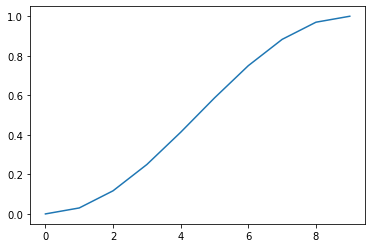

In [35]:
a = 0.5-0.5*np.cos(np.linspace(0,np.pi,10))
plt.plot(a)

In [54]:
def whitenoise(T, flow=None, fhigh=None, fslow=None, fshigh=None, nchannels=1, fs=48000):
    """
    Genera ruido blanco de duracion T limitado en banda entre flow y fhigh (fslow y fshigh dan las pendientes de
    la sigmoidea del limite de banda) puede generar nchannels canales
    """
    nsamples = int(fs*T)
    freqs = np.fft.rfftfreq(nsamples, 1/fs)
    freqs[0] = 1/nsamples
    fmax = freqs[-1]
    if flow is not None:
        if fslow is None:
            fslow=flow
        s1 = sigmoid(freqs/fmax,flow/fmax,fslow/fmax)
    else:
        s1 = 1
    if fhigh is not None:
        if fshigh is None:
            fshigh=fshigh/4.0
        s2 = sigmoid(freqs/fmax,fhigh/fmax,-fshigh/fmax)
    else:
        s2 = 1
    real = s1*s2*np.random.randn(nchannels, freqs.shape[0])
    imag = s1*s2*np.random.randn(nchannels, freqs.shape[0])
    if not nsamples & 1:
        imag[-1] = 0.
    wnoise = np.array(np.fft.irfft(real + 1j*imag),ndmin=2, dtype='float64').T
    wnoise /= np.abs(wnoise).max(axis=0)
    return wnoise

In [67]:
a = np.ones_like(s)
a.shape

(48, 1)

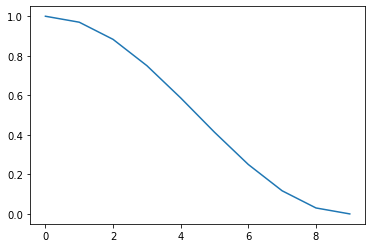

In [80]:
a = 0.5+0.5*np.cos(np.linspace(0,np.pi,10))
plt.plot(a)

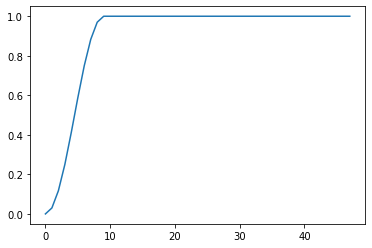

In [74]:
plt.plot(a)

In [75]:
sweep1.shape

(480000,)

In [79]:
s.shape[1]

1

In [81]:
def envelope(data, fadein=0.05, fadeout=None, fs=48000):
    if fadein is not None:
        nin = int(2.0*fadein*fs)
        a = (1.0-np.cos(np.linspace(0,np.pi,nin)))/2.0 
        if data.ndim == 2:
            for n in range(data.shape[1]):
                data[:nin,n]  *= a
        else:
            data[:nin] *= a
    if fadeout is not None:
        nout = int(2.0*fadeout*fs)
        a = (1.0+np.cos(np.linspace(0,np.pi,nout)))/2.0 
        if data.ndim == 2:
            for n in range(data.shape[1]):
                data[-nout:,n]  *= a
        else:
            data[-nin:] *= a        
    return data

In [83]:
s = np.ones((1000,1))

In [85]:
s = envelope(s,fadein=0.002,fadeout=0.001)
plt.plot(s)

ValueError: operands could not be broadcast together with shapes (192,) (96,) (192,) 